In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

# EDA

In [4]:
raw_path = 'data/raw/'
train = pd.read_csv(os.path.join(raw_path, 'train.csv'))
test = pd.read_csv(os.path.join(raw_path, 'test.csv'))

In [5]:
TARGET_COLS = ['Артериальная гипертензия', 'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность', 'Прочие заболевания сердца']
ID_COL = 'ID'
EDU_COL = 'Образование'
SEX_COL = 'Пол'
CAT_COLS = [
    'Пол', 'Семья', 'Этнос', 'Национальность', 'Религия', 'Образование', 
    'Профессия', 'Статус Курения', 'Частота пасс кур', 'Алкоголь',
    'Время засыпания', 'Время пробуждения'
]
OHE_COLS = [
    'Пол', 'Вы работаете?', 'Выход на пенсию', 'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит',
    'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма', 'Туберкулез легких ', 'ВИЧ/СПИД',
    'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы','Пассивное курение', 'Сон после обеда', 
    'Спорт, клубы', 'Религия, клубы'
]
REAL_COLS = ['Возраст курения', 'Сигарет в день', 'Возраст алког']

In [6]:
def set_idx(df: pd.DataFrame, idx_col: str) -> pd.DataFrame:
    df = df.set_index(idx_col)
    return df

In [7]:
train = train.set_index(ID_COL)
test = test.set_index(ID_COL)

In [8]:
train, target = train.drop(TARGET_COLS, axis=1), train[TARGET_COLS]

In [10]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df = set_idx(df, ID_COL)
    df = drop_unnecesary_id(df)
    df = fill_sex(df)
    df = cast_types(df)
    return df
    
    

In [11]:
def drop_unnecesary_id(df: pd.DataFrame) -> pd.DataFrame:
    if 'ID_y' in df.columns:
        df = df.drop('ID_y', axis=1)
    return df

In [12]:
train = drop_unnecesary_id(train)

In [13]:
def add_ord_edu(df: pd.DataFrame) -> pd.DataFrame:
    df[f'{EDU_COL}_ord'] = df[EDU_COL].str.slice(0, 1).astype(np.int8).values
    return df

In [14]:
train = add_ord_edu(train)
test = add_ord_edu(test)

In [15]:
def fill_sex(df: pd.DataFrame) -> pd.DataFrame:
    most_freq = df[SEX_COL].value_counts().index[0]
    df[SEX_COL] = df[SEX_COL].fillna(most_freq)
    return df

In [16]:
def cast_types(df: pd.DataFrame) -> pd.DataFrame:
    df[CAT_COLS] = df[CAT_COLS].astype('category')

    ohe_int_cols = train[OHE_COLS].select_dtypes('number').columns
    df[ohe_int_cols] = df[ohe_int_cols].astype(np.int8)

    df[REAL_COLS] = df[REAL_COLS].astype(np.float32)
    return df
    

# MODELING

In [17]:
import os
import pandas as pd
import numpy as np

In [18]:
from sklearn.svm import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.compose import *
from sklearn.pipeline import *
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.multioutput import *

In [19]:
import src.config as cfg

In [20]:
RS = 77

In [27]:
processed_data_path = 'data/processed/'
train = pd.read_pickle(os.path.join(processed_data_path, 'train.pkl'))
target = pd.read_pickle(os.path.join(processed_data_path, 'target.pkl'))

In [22]:
train[cfg.CAT_COLS] = train[cfg.CAT_COLS].astype('object')

In [23]:
# int8_cols = train.head(0).select_dtypes('int8').columns
# train[int8_cols] = train[int8_cols].astype(np.int32)
# target = target.astype(np.int32)

In [24]:
from functools import partial

In [25]:
scoring = partial(fbeta_score, beta=2.0)

In [28]:
train_idx, val_idx = train_test_split(
        train.index, test_size=0.2, random_state=7)

In [29]:
train_idx

Index(['54-501-041-01', '54-101-071-01', '54-102-244-01', '54-601-028-02',
       '54-601-006-01', '54-501-062-01', '54-001-070-02', '54-101-008-02',
       '54-002-111-01', '54-102-053-01',
       ...
       '54-002-004-02', '54-101-065-01', '54-501-038-01', '54-101-044-01',
       '54-103-069-01', '54-102-250-01', '54-701-012-02', '54-102-018-02',
       '54-102-029-01', '54-102-340-01'],
      dtype='object', name='ID', length=764)

In [32]:
val_idx.to_frame().to_pickle('temp.pkl')

In [33]:
import pickle

In [34]:
with open('tmp2.pkl', 'wb') as f:
    pickle.dump(val_idx, f)

In [36]:
with open('tmp2.pkl', 'rb') as f:
    val_idx2 = pickle.load(f)

In [39]:
type(train)

pandas.core.frame.DataFrame

pandas.core.indexes.base.Index

In [40]:
type(val_idx2)

pandas.core.indexes.base.Index

In [37]:
val_idx2

Index(['54-501-020-01', '54-101-047-01', '54-102-300-03', '54-103-046-01',
       '54-602-026-02', '54-002-118-01', '54-501-071-01', '54-501-055-02',
       '54-001-033-01', '54-001-062-01',
       ...
       '54-503-002-01', '54-601-019-02', '54-501-061-01', '54-503-008-01',
       '54-103-053-01', '54-504-003-01', '54-501-035-02', '54-102-159-01',
       '54-103-096-02', '54-701-005-01'],
      dtype='object', name='ID', length=191)

In [26]:
train_data, val_data, train_target, val_target = train_test_split(train, target, train_size=0.8, random_state=RS)

In [15]:
train_data.head()

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Сигарет в день,Пассивное курение,Частота пасс кур,Алкоголь,Возраст алког,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы"
ID,,,,,,,,,,,,,,,,,,,,,
54-103-054-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,1,0,0,...,NaN,0,NaN,употребляю в настоящее время,26.0,22:00:00,06:00:00,0,1,0
54-102-299-01,Ж,вдовец / вдова,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,...,NaN,0,NaN,никогда не употреблял,NaN,22:30:00,08:30:00,0,1,0
54-102-138-01,Ж,никогда не был(а) в браке,европейская,Русские,Христианство,5 - ВУЗ,низкоквалифицированные работники,1,0,0,...,NaN,0,NaN,никогда не употреблял,NaN,22:00:00,06:30:00,0,0,0
54-601-033-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,операторы и монтажники установок и машинного о...,0,1,0,...,NaN,0,NaN,употребляю в настоящее время,20.0,22:00:00,07:00:00,0,0,0
54-602-054-01,Ж,в разводе,европейская,Русские,Христианство,4 - профессиональное училище,ведение домашнего хозяйства,0,1,0,...,10.0,0,NaN,употребляю в настоящее время,18.0,00:00:00,07:00:00,1,0,0


In [16]:
real_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
]
)

In [17]:
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [2]:
import category_encoders as ce

/opt/miniconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [18]:
preprocess_pipe = ColumnTransformer(transformers=[
    ('real_cols', real_pipe, cfg.REAL_COLS),
    ('cat_cols', cat_pipe, cfg.CAT_COLS),
    ('woe_cat_cols', ce.WOEEncoder(), cfg.CAT_COLS),
    ('ohe_cols', 'passthrough', cfg.OHE_COLS)
]
)

In [19]:
model = LinearSVC()

In [20]:
model_pipe = Pipeline([
    ('preprocess', preprocess_pipe),
    ('model', model)
]
)

In [21]:
multiout_model_pipe = MultiOutputClassifier(model_pipe, n_jobs=4)

In [24]:
scores = cross_val_score(
    estimator=multiout_model_pipe,
    X=train_data,
    y=train_target,
    scoring='f1_samples',
    cv=3,
    n_jobs=1
)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

In [25]:
scores

array([0.24287582, 0.21764706, 0.23425197])

In [1]:
from src.models.sklearn_model import model

/opt/miniconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
import pandas as pd

In [5]:
train = pd.read_pickle('../data/processed/train.pkl')
target = pd.read_pickle('../data/interim/target.pkl')

In [21]:
import category_encoders as ce
import src.config as cfg
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

real_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
    ]
)

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ]
)

preprocess_pipe = ColumnTransformer(transformers=[
    ('real_cols', real_pipe, cfg.REAL_COLS),
    ('cat_cols', cat_pipe, cfg.CAT_COLS),
    ('woe_cat_cols', ce.WOEEncoder(), cfg.CAT_COLS),
    ('ohe_cols', 'passthrough', cfg.OHE_COLS)
    ]
)

base_model = LogisticRegression()

model = MultiOutputClassifier(Pipeline([
    ('preprocess', preprocess_pipe),
    ('model', base_model)
    ]
)
)

In [22]:
model.fit(train, target)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MultiOutputClassifier(estimator=Pipeline(steps=[('preprocess',
                                                 ColumnTransformer(transformers=[('real_cols',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Возраст '
                                                                                   'курения',
                                                                                   'Сигарет '
                                                                                   'в '
                                                                                   'день',
                                                                                   'Возраст '
                                                                                   'алког']),
                                                                                 ('cat_cols',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer(fill_value='NA',
                                                                                                                 strategy='constant')),
                                                                                                  ('ohe',
                                                                                                   OneHotEncoder...
                                                                                   'Прекращение '
                                                                                   'работы '
                                                                                   'по '
                                                                                   'болезни',
                                                                                   'Сахарный '
                                                                                   'диабет',
                                                                                   'Гепатит',
                                                                                   'Онкология',
                                                                                   'Хроническое '
                                                                                   'заболевание '
                                                                                   'легких',
                                                                                   'Бронжиальная '
                                                                                   'астма',
                                                                                   'Туберкулез '
                                                                                   'легких ',
                                                                                   'ВИЧ/СПИД',
                                                                                   'Регулярный '
                                                                                   'прим '
                                                                                   'лекарственных '
                                                                                   'средств',
                                                                                   'Травмы '
                                                    

In [25]:
pred = model.predict_proba(train)

<AxesSubplot:ylabel='Frequency'>

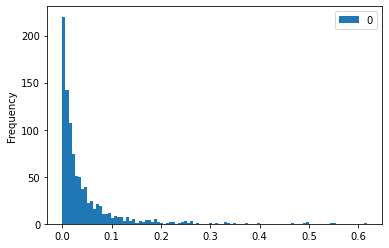

In [41]:
pd.DataFrame(pred[1][:, 1]).plot(kind='hist', bins=100)

In [35]:
np.stack([p[:, 1] for p in pred]).T.shape

(955, 5)

In [20]:
pred.shape

(955, 5)

In [42]:
a = [1,2,3]

In [43]:
b = a[:]

In [44]:
a[1] = 99

In [45]:
a

[1, 99, 3]

In [46]:
b

[1, 2, 3]

In [47]:
df = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6]})

In [48]:
df2 = df['B']

In [51]:
df['B'].equals(df2)

True

In [52]:
df.loc[1, 'B'] = 777

In [53]:
df

,A,B
0,1,4
1,2,777
2,3,6


In [54]:
df2

0      4
1    777
2      6
Name: B, dtype: int64

In [56]:
val_true = pd.read_pickle('../data/interim/val_target.pkl')

In [57]:
val_true.shape

(191, 5)

In [60]:
val_rand = np.random.randint(0, 2, size=val_true.shape)

In [61]:
import pickle

In [62]:
with open('../predictions/val_predict_rand.pkl', 'wb') as f:
    pickle.dump(val_rand, f)